---
**University of management and technology (UMT), Lahore**



**students’ psychological health impacted by using e-learning tools during COVID-19**




---



---

**By:**

**Khushal Das - khushaldasparmar@gmail.com**


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

In [ ]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# read data set file
df = pd.read_csv('umtData.csv')
df.head()

,Timestamp,UMT Student ID,Gender,Age,Education Level/Year,Your cumulative average (GPA),Before COVID-19: Which of the following digital tool do you usually use?,After COVID-19: Which of the following digital tool do you usually use?,Before COVID-19: How much time do you spend using digital tools in learning?,After COVID-19: How much time do you spend using the digital tools in learning?,"Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","Before COVID-19: When I use the mobile phone, tablet, or laptop in e-learning, I cannot concentrate and I am distracted.","After COVID-19: When I use the mobile phone, tablet, or laptop in e-learning, I cannot concentrate and I am distracted.",Before COVID-19: I have fixed hours for bedtime and wake-up.,After COVID-19: I have fixed hours for bedtime and wake-up.,"Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.","After COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.",Before COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting,After COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting.,"The distance learning system, caused by the COVID-19 epidemic, resulted in social distancing.","Prolonged use of digital tools (mobile, laptop, i-pad) causes students’ isolation",University learning contributes to strengthening the social personality of students.,Staying home for long periods of time leads to lethargy and laziness.,"Prolonged use of e-learning tools often leads to boredom, nervousness, and tension.",The psychological element is a key factor in the success of the educational process.,"Some students cannot afford to buy all the necessary digital tools, which is embarrassing and frustrating.",I don’t recommend continuing with the online learning model because it is socially and psychologically unhealthy.,"Measures of lockdown, closures, and quarantine, brought by COVID-19 caused stress, frustration, and depression.",The use of digital learning tools is responsible for my low academic performance.,"The volume of assignments via e-learning led to confusion, frustration, and poor performance.",Face-to-face interaction contributes significantly to boosting students’ academic achievement.,Taking quizzes and exams online from home was not comfortable and made me nervous.,Before Covid: University Staff is very helpful,After Covid: University Staff is very helpful,Any Comments or Suggestions
0,2020/12/31 12:18:25 AM GMT+5,15004119003,Male,18-24,Bachelor- Final year,3.5,Mobile Phone,Laptop,3-6,1-3,Agree,Agree,Strongly disagree,Agree,Agree,strongly agree,Strongly disagree,Agree,Strongly agree,Agree,strongly agree,Agree,Disagree,Agree,Strongly disagree,Agree,Disagree,Agree,strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,Agree,NaN
1,2020/12/31 12:21:50 AM GMT+5,F2020313020,Female,18-24,Masters,3.14,Laptop,Laptop,1-3,9-12,Strongly disagree,Strongly agree,Neutral,Neutral,Strongly agree,NaN,Strongly disagree,Strongly agree,Disagree,strongly agree,Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,strongly agree,strongly agree,Strongly agree,Neutral,strongly agree,Neutral,Strongly agree,Neutral,NaN
2,2020/12/31 12:30:26 AM GMT+5,F2020313013,Male,18-24,Masters,NaN,Mobile Phone,Laptop,1-3,1-3,Disagree,Agree,Disagree,Agree,Disgree,Disgree,Strongly disagree,Strongly disagree,Disagree,Agree,Agree,Agree,Disagree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Disagree,Great survey. Good luck for analysis
3,2020/12/31 12:57:36 AM GMT+5,f2020313008,Male,18-24,Masters,2.7,Laptop,Laptop,6-9,6-9,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,S

In [ ]:
# dimentions of dataset
df.shape

(731, 36)

In [ ]:
#Name of columns
df.columns

Index(['Timestamp', 'UMT Student ID', 'Gender', 'Age', 'Education Level/Year',
       'Your cumulative average (GPA)',
       'Before COVID-19: Which of the following digital tool do you usually use?',
       'After COVID-19: Which of the following digital tool do you usually use?',
       'Before COVID-19: How much time do you spend using digital tools in learning?',
       'After COVID-19: How much time do you spend using the digital tools in learning?',
       'Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.',
       'After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.',
       'Before COVID-19: When I use the mobile phone, tablet, or laptop in e-learning, I cannot concentrate and I am distracted.',
       'After COVID-19: When I use the mobile phone, tablet, or laptop in e-learning, I cannot concentrate and I am distracted.',
       'Before COVID-19: I have fixed hours for bedtime and wake-up.',
       'After COVID-19: I 

In [ ]:
# remove not usable columns from dataset
df.drop(columns={'Timestamp'}, inplace=True)
df.drop(columns={'Your cumulative average (GPA)'}, inplace=True)
df.drop(columns={'UMT Student ID'}, inplace=True)
df.drop(columns={'Age'}, inplace=True)
df.drop(columns={'Any Comments or Suggestions '}, inplace=True)

In [ ]:
# rename columns for understandable with minimum length of strings
df.rename(columns={
    'Education Level/Year':'Study_Level',
    'Before COVID-19: Which of the following digital tool do you usually use?':'Before_tools',
    'After COVID-19: Which of the following digital tool do you usually use?':'After_tools',
    'Before COVID-19: How much time do you spend using digital tools in learning?':'Before_tools_timing',
    'After COVID-19: How much time do you spend using the digital tools in learning?':'After_tools_timing',
    'Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.':'Before_tools_feedback',
    'After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.':'After_tools_feedback',
    'Before COVID-19: When I use the mobile phone, tablet, or laptop in e-learning, I cannot concentrate and I am distracted.':'Before_distraction_feedback',
    'After COVID-19: When I use the mobile phone, tablet, or laptop in e-learning, I cannot concentrate and I am distracted.':'After_distraction_feedback',
    'Before COVID-19: I have fixed hours for bedtime and wake-up.':'Before_sleeping_Time_feedback',
    'After COVID-19: I have fixed hours for bedtime and wake-up. ':'After_sleeping_Time_feedback',
    'Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.':'Before_sleeping_habits_affected_by_tools_feedback',
    'After COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.':'After_sleeping_habits_affected_by_tools_feedback',
    'Before COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting':'Before_electronic_screens_exhausting_feedback',
    'After COVID-19: Continuous exposure to electronic screens in online learning is tiring and exhausting.':'After_electronic_screens_exhausting_feedback',
    'The distance learning system, caused by the COVID-19 epidemic, resulted in social distancing.':'Social_distancing_feedback',
    'Prolonged use of digital tools (mobile, laptop, i-pad) causes students’ isolation':'Students_isolation_feedback',
    'University learning contributes to strengthening the social personality of students.':'Students_social_personality_feedback',
    'Staying home for long periods of time leads to lethargy and laziness.':'Staying_home_feedback',
    'Prolonged use of e-learning tools often leads to boredom, nervousness, and tension.':'E_learning_tools_tension_feedback',
    'The psychological element is a key factor in the success of the educational process.':'Psychological_effect_for_education_feedback',
    'Some students cannot afford to buy all the necessary digital tools, which is embarrassing and frustrating.':'Not_available_digital_tools_frustrating_feedback',
    'I don’t recommend continuing with the online learning model because it is socially and psychologically unhealthy.':'Online_learning_not_good_feedback',
    'Measures of lockdown, closures, and quarantine, brought by COVID-19 caused stress, frustration, and depression.':'Depression_of_quarantine_feedback',
    'The use of digital learning tools is responsible for my low academic performance.':'Study_affected_by_digital_tools',
    'The volume of assignments via e-learning led to confusion, frustration, and poor performance. ':'Poor_performance_by_e-learning',
    'Face-to-face interaction contributes significantly to boosting students’ academic achievement.':'Face-to-face_interaction_for_academic_performance',
    'Taking quizzes and exams online from home was not comfortable and made me nervous.':'Negative_performance_for_online_Exams',
    'Before Covid: University Staff is very helpful ':'Before_Staff_helpful',
    'After Covid: University Staff is very helpful':'After_Staff_helpful',
}, inplace=True)

In [ ]:
df.head()

,Gender,Study_Level,Before_tools,After_tools,Before_tools_timing,After_tools_timing,Before_tools_feedback,After_tools_feedback,Before_distraction_feedback,After_distraction_feedback,Before_sleeping_Time_feedback,After_sleeping_Time_feedback,Before_sleeping_habits_affected_by_tools_feedback,After_sleeping_habits_affected_by_tools_feedback,Before_electronic_screens_exhausting_feedback,After_electronic_screens_exhausting_feedback,Social_distancing_feedback,Students_isolation_feedback,Students_social_personality_feedback,Staying_home_feedback,E_learning_tools_tension_feedback,Psychological_effect_for_education_feedback,Not_available_digital_tools_frustrating_feedback,Online_learning_not_good_feedback,Depression_of_quarantine_feedback,Study_affected_by_digital_tools,Poor_performance_by_e-learning,Face-to-face_interaction_for_academic_performance,Negative_performance_for_online_Exams,Before_Staff_helpful,After_Staff_helpful
0,Male,Bachelor- Final year,Mobile Phone,Laptop,3-6,1-3,Agree,Agree,Strongly disagree,Agree,Agree,strongly agree,Strongly disagree,Agree,Strongly agree,Agree,strongly agree,Agree,Disagree,Agree,Strongly disagree,Agree,Disagree,Agree,strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,Agree
1,Female,Masters,Laptop,Laptop,1-3,9-12,Strongly disagree,Strongly agree,Neutral,Neutral,Strongly agree,NaN,Strongly disagree,Strongly agree,Disagree,strongly agree,Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,strongly agree,strongly agree,Strongly agree,Neutral,strongly agree,Neutral,Strongly agree,Neutral
2,Male,Masters,Mobile Phone,Laptop,1-3,1-3,Disagree,Agree,Disagree,Agree,Disgree,Disgree,Strongly disagree,Strongly disagree,Disagree,Agree,Agree,Agree,Disagree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Disagree
3,Male,Masters,Laptop,Laptop,6-9,6-9,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,strongly disagree,Agree,Agree,Strongly disagree,Neutral,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Disagree,Agree
4,Female,Bachelor - Third year,Mobile Phone,Laptop,6-9,+12,Strongly agree,Strongly agree,Disagree,Strongly Agree,Strongly agree,Disgree,Neutral,Strongly agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Agree,Neutral


In [ ]:
#Data description
df.describe()

,Gender,Study_Level,Before_tools,After_tools,Before_tools_timing,After_tools_timing,Before_tools_feedback,After_tools_feedback,Before_distraction_feedback,After_distraction_feedback,Before_sleeping_Time_feedback,After_sleeping_Time_feedback,Before_sleeping_habits_affected_by_tools_feedback,After_sleeping_habits_affected_by_tools_feedback,Before_electronic_screens_exhausting_feedback,After_electronic_screens_exhausting_feedback,Social_distancing_feedback,Students_isolation_feedback,Students_social_personality_feedback,Staying_home_feedback,E_learning_tools_tension_feedback,Psychological_effect_for_education_feedback,Not_available_digital_tools_frustrating_feedback,Online_learning_not_good_feedback,Depression_of_quarantine_feedback,Study_affected_by_digital_tools,Poor_performance_by_e-learning,Face-to-face_interaction_for_academic_performance,Negative_performance_for_online_Exams,Before_Staff_helpful,After_Staff_helpful
count,731,731,731,731,731,731,731,731,731,731,731,730,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731
unique,2,6,5,5,5,5,5,5,5,5,5,6,5,5,5,6,6,5,5,5,5,5,5,6,6,5,5,6,5,5,5
top,Male,Bachelor- Final year,Laptop,Laptop,3-6,6-9,Agree,Strongly agree,Agree,Agree,Agree,Neutral,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Agree,Agree,Agree
freq,503,340,469,516,467,470,513,476,400,392,386,186,406,368,401,395,377,516,360,345,478,346,361,404,387,456,362,395,386,379,283


**Changing string data in survey into integers**

<pre>'Strongle Agree'=5
'Agree'=4
'Uncertain'=3
'Disagree'=2
'Strongly Disagree'=1
<pre>

In [ ]:
#get unique values of column
df.After_sleeping_Time_feedback.unique()

array(['strongly agree', nan, 'Disgree', 'Strongly disagree', 'Neutral',
       'Agree', 'Strongly agree'], dtype=object)

In [ ]:
#Replacing catogorical values with integers

df.replace(to_replace='Strongly agree', value=5, inplace=True)
df.replace(to_replace='Strongly Agree', value=5, inplace=True)
df.replace(to_replace='strongly agree', value=5, inplace=True)
df.replace(to_replace='Agree', value=4, inplace=True)

df.replace(to_replace='Neutral', value=3, inplace=True)

df.replace(to_replace='Disagree', value=2, inplace=True)
df.replace(to_replace='Disgree', value=2, inplace=True)
df.replace(to_replace='Strongly disagree', value=1, inplace=True)
df.replace(to_replace='Strongly Disagree', value=1, inplace=True)
df.replace(to_replace='strongly disagree', value=1, inplace=True)

In [ ]:
#Finding null values in data 

df.iloc[:, 1:-1].isna().sum()

Study_Level                                          0
Before_tools                                         0
After_tools                                          0
Before_tools_timing                                  0
After_tools_timing                                   0
Before_tools_feedback                                0
After_tools_feedback                                 0
Before_distraction_feedback                          0
After_distraction_feedback                           0
Before_sleeping_Time_feedback                        0
After_sleeping_Time_feedback                         1
Before_sleeping_habits_affected_by_tools_feedback    0
After_sleeping_habits_affected_by_tools_feedback     0
Before_electronic_screens_exhausting_feedback        0
After_electronic_screens_exhausting_feedback         0
Social_distancing_feedback                           0
Students_isolation_feedback                          0
Students_social_personality_feedback                 0
Staying_ho

In [ ]:
#we have only one null value
#replacing it with mode of column because of catagorical values

df['After_sleeping_Time_feedback'].fillna(df['After_sleeping_Time_feedback'].mode()[0], inplace=True)
df['After_sleeping_Time_feedback'].isna().sum()

0

In [ ]:
df.iloc[:,1:-1].isna().sum()

Study_Level                                          0
Before_tools                                         0
After_tools                                          0
Before_tools_timing                                  0
After_tools_timing                                   0
Before_tools_feedback                                0
After_tools_feedback                                 0
Before_distraction_feedback                          0
After_distraction_feedback                           0
Before_sleeping_Time_feedback                        0
After_sleeping_Time_feedback                         0
Before_sleeping_habits_affected_by_tools_feedback    0
After_sleeping_habits_affected_by_tools_feedback     0
Before_electronic_screens_exhausting_feedback        0
After_electronic_screens_exhausting_feedback         0
Social_distancing_feedback                           0
Students_isolation_feedback                          0
Students_social_personality_feedback                 0
Staying_ho

In [ ]:
#verifying catogorical values, after converting them into integers
df.Staying_home_feedback.unique()

array([4, 1, 5, 3, 2])

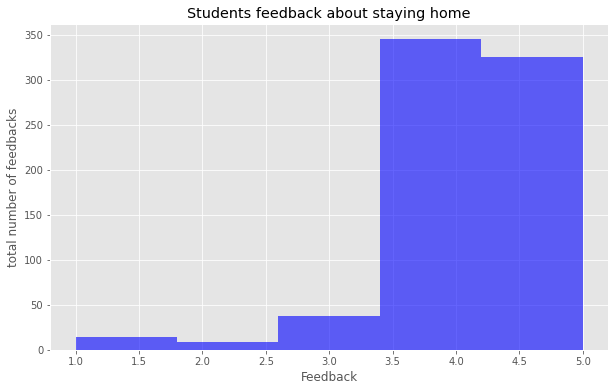

In [ ]:
# students staying home feedback
df['Staying_home_feedback'].plot(
    kind='hist',
    figsize=(10,6),
    bins=5,
    color='blue',
    alpha=0.6
)
plt.title('Students feedback about staying home')
plt.xlabel('Feedback')
plt.ylabel('total number of feedbacks')
plt.show()

In [ ]:
# seprate male and female staying_home_feedback and get sum of values
male_staying_home_feedback = df.loc[df['Gender']=='Male',['Staying_home_feedback']]
male_staying_home_feedback = male_staying_home_feedback['Staying_home_feedback'].value_counts(sort=True, ascending=True)

female_staying_home_feedback = df.loc[df['Gender']=='Female',['Staying_home_feedback']]
female_staying_home_feedback = female_staying_home_feedback['Staying_home_feedback'].value_counts(sort=True, ascending=True)

staying_home_feedback = pd.DataFrame({'female':female_staying_home_feedback,'male':male_staying_home_feedback})


In [ ]:
staying_home_feedback

,female,male
1,4,10
2,4,5
3,12,26
4,98,247
5,110,215


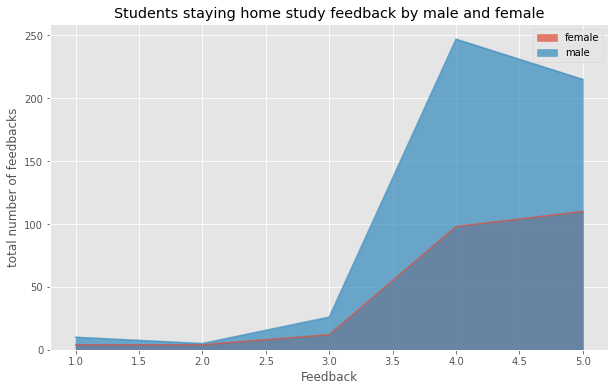

In [ ]:
staying_home_feedback.plot(kind='area', figsize=(10, 6), stacked=False, alpha=0.7)
plt.title('Students staying home study feedback by male and female')
plt.xlabel('Feedback')
plt.ylabel('total number of feedbacks')
plt.show()

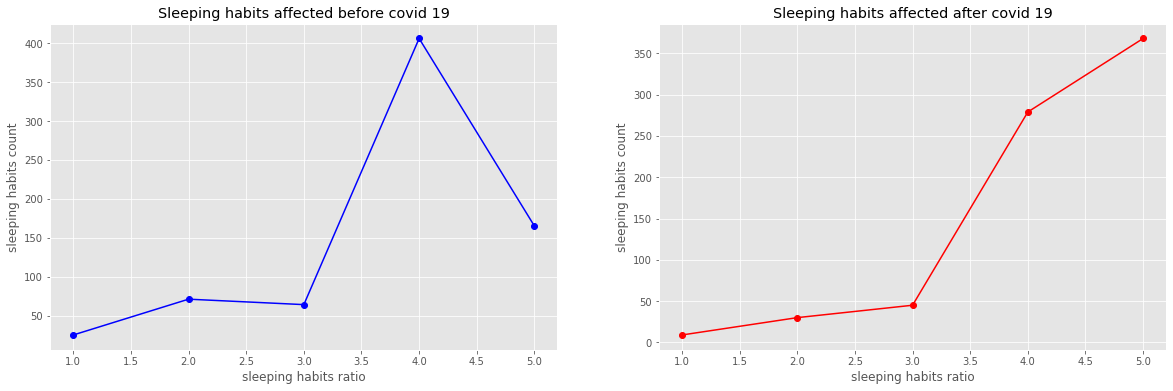

In [ ]:
# line chart of comparison sleeping habits of students before and after covid 19
plt_fig = plt.figure()
ax0 = plt_fig.add_subplot(1,2,1)
ax1 = plt_fig.add_subplot(1,2,2)

sleeping_habits = df['Before_sleeping_habits_affected_by_tools_feedback'].value_counts();
sleeping_habits = sleeping_habits.sort_index()
sleeping_habits.plot(kind='line',
                     figsize=(20,6),
                     color='blue',
                     marker='o',
                     ax=ax0
                    )
ax0.set_title('Sleeping habits affected before covid 19')
ax0.set_xlabel('sleeping habits ratio')
ax0.set_ylabel('sleeping habits count')

after_sleeping_habits = df['After_sleeping_habits_affected_by_tools_feedback'].value_counts();
after_sleeping_habits = after_sleeping_habits.sort_index()
after_sleeping_habits.plot(kind='line',
                           figsize=(20,6),
                           color='red',
                           marker='o',
                           ax=ax1
                          )
ax1.set_title('Sleeping habits affected after covid 19')
ax1.set_xlabel('sleeping habits ratio')
ax1.set_ylabel('sleeping habits count')

plt.show()

In [ ]:
# sort data with top 5 ratings
df_feedbacks = pd.DataFrame()
for i, column in enumerate(df.iloc[:,9:-1].columns):
    df_feedbacks[column] = df[column].value_counts(sort=True, ascending=True);
    
df_feedbacks = df_feedbacks.sort_values(df_feedbacks.index[4], axis=1)

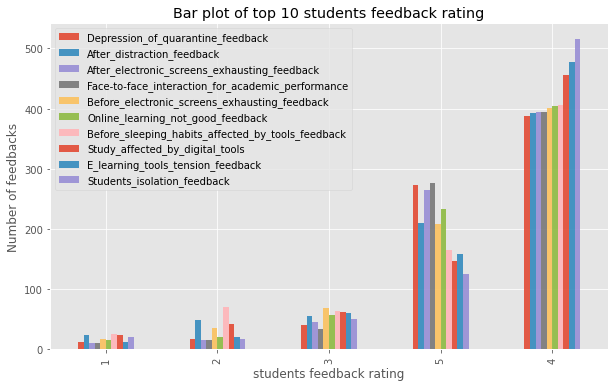

In [ ]:
# bar plot of top 10 feedbacks of students
top_10_feebacks = df_feedbacks.iloc[:,-10:]

top_10_feebacks.plot(kind='bar', stacked=False, figsize=(10, 6), alpha=0.9)
plt.title('Bar plot of top 10 students feedback rating')
plt.xlabel('students feedback rating')
plt.ylabel('Number of feedbacks')
plt.show()

# **1). Prediction of Students e-learning tools depression and tension**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:

X_model1 = df[['Students_isolation_feedback',
               'Students_social_personality_feedback',
               'Staying_home_feedback',
               'Psychological_effect_for_education_feedback',
               'Not_available_digital_tools_frustrating_feedback',
               'Online_learning_not_good_feedback',
               'Depression_of_quarantine_feedback',
               'Study_affected_by_digital_tools']].values

X_model1 = preprocessing.StandardScaler().fit(X_model1).transform(X_model1.astype(float))

y_model1 = df['E_learning_tools_tension_feedback'].values

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_model1, y_model1, test_size=0.2)

# train data using X_train and Y_train variable
kf = KFold(n_splits=50, random_state=None, shuffle=True)

kf.get_n_splits(X_model1)

for train_index, test_index in kf.split(X_model1):
    X1_train, X1_test = X_model1[train_index], X_model1[test_index]
    y1_train, y1_test = y_model1[train_index], y_model1[test_index]

knn_model = KNeighborsClassifier()
scores = cross_val_score(knn_model, X1_train, y1_train, scoring='accuracy', cv=kf, n_jobs=-1)
scores


array([0.86666667, 0.66666667, 0.73333333, 0.73333333, 0.66666667,
       0.86666667, 0.86666667, 0.66666667, 0.93333333, 0.73333333,
       0.66666667, 0.73333333, 0.53333333, 0.73333333, 0.6       ,
       0.66666667, 0.66666667, 0.57142857, 0.78571429, 0.78571429,
       0.78571429, 1.        , 0.64285714, 0.57142857, 0.78571429,
       0.64285714, 0.5       , 0.5       , 0.78571429, 0.71428571,
       0.71428571, 0.64285714, 0.57142857, 0.64285714, 0.78571429,
       0.78571429, 0.42857143, 0.85714286, 0.85714286, 0.57142857,
       0.57142857, 0.5       , 0.71428571, 0.85714286, 0.78571429,
       0.78571429, 0.85714286, 0.71428571, 0.71428571, 0.85714286])

In [ ]:
#Model giving maximum accuracy #KNN #KFOLD
scores.max()

1.0

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_model1, y_model1, test_size=0.2)


In [ ]:
#simple KNN
knn_ = KNeighborsClassifier(n_neighbors=50)
knn_.fit(X1_train, y1_train)
score = knn_.score(X1_test, y1_test)
score

0.6870748299319728

In [ ]:
y_pred = knn_.predict(X1_test)
conf_mat = confusion_matrix(y1_test, y_pred)
conf_mat

array([[ 0,  3,  2,  0],
       [ 0,  3,  8,  0],
       [ 0,  3, 94,  0],
       [ 0,  0, 30,  4]])

In [ ]:
#naive bayes
naive_ = GaussianNB()
naive_.fit(X1_train, y1_train)
score = naive_.score(X1_test, y1_test)
score

0.6394557823129252

In [ ]:
#RandomForestClassifier
randomforest_ = RandomForestClassifier()
randomforest_.fit(X1_train, y1_train)
score = randomforest_.score(X1_test, y1_test)
score

0.6462585034013606

In [ ]:
#DecisionTreeClassifier
decisionTree_ = DecisionTreeClassifier()
decisionTree_.fit(X1_train, y1_train)
score = decisionTree_.score(X1_test, y1_test)
score

0.6870748299319728

In [ ]:
#LogisticRegression
logisticRegression_ = LogisticRegression()
logisticRegression_.fit(X1_train, y1_train)
score = logisticRegression_.score(X1_test, y1_test)
score

0.6666666666666666

# **2). Prediction of Students sleeping habits affected by tools**


In [ ]:
X_model2 = df[['After_sleeping_habits_affected_by_tools_feedback',
                'Before_sleeping_habits_affected_by_tools_feedback',
                'Before_electronic_screens_exhausting_feedback',
                'After_electronic_screens_exhausting_feedback',
                'Before_sleeping_Time_feedback',
                ]].values
X_model2 = preprocessing.StandardScaler().fit(X_model2).transform(X_model2.astype(float))
y_model2 = df['After_sleeping_Time_feedback'].values

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_model2, y_model2, test_size=0.2)
# train data using X_train and Y_train variable
kf_repeated = RepeatedKFold(n_splits=40, n_repeats=3, random_state=1)
kf_repeated.get_n_splits(X_model2)

for train_index, test_index in kf_repeated.split(X_model2):
    X2_train, X2_test = X_model2[train_index], X_model2[test_index]
    y2_train, y2_test = y_model2[train_index], y_model2[test_index]

knn_model = KNeighborsClassifier()
scores = cross_val_score(knn_model, X2_train, y2_train, scoring='accuracy', cv=kf_repeated, n_jobs=-1)
scores

array([0.61111111, 0.55555556, 0.5       , 0.5       , 0.5       ,
       0.83333333, 0.38888889, 0.33333333, 0.33333333, 0.5       ,
       0.38888889, 0.5       , 0.38888889, 0.33333333, 0.61111111,
       0.5       , 0.33333333, 0.27777778, 0.61111111, 0.38888889,
       0.44444444, 0.38888889, 0.55555556, 0.27777778, 0.33333333,
       0.27777778, 0.33333333, 0.61111111, 0.38888889, 0.55555556,
       0.5       , 0.44444444, 0.38888889, 0.29411765, 0.58823529,
       0.47058824, 0.47058824, 0.47058824, 0.52941176, 0.58823529,
       0.38888889, 0.38888889, 0.5       , 0.33333333, 0.38888889,
       0.61111111, 0.5       , 0.38888889, 0.33333333, 0.72222222,
       0.55555556, 0.5       , 0.38888889, 0.44444444, 0.55555556,
       0.44444444, 0.44444444, 0.61111111, 0.5       , 0.61111111,
       0.38888889, 0.61111111, 0.55555556, 0.61111111, 0.44444444,
       0.38888889, 0.38888889, 0.38888889, 0.44444444, 0.33333333,
       0.61111111, 0.38888889, 0.38888889, 0.47058824, 0.11764

In [ ]:
#Model giving maximum accuracy 
scores.max()

0.8333333333333334

In [ ]:
naiveBayes_model = GaussianNB()
scores = cross_val_score(naiveBayes_model, X2_train, y2_train, scoring='accuracy', cv=kf_repeated, n_jobs=-1)
scores

array([0.38888889, 0.11111111, 0.38888889, 0.44444444, 0.27777778,
       0.38888889, 0.33333333, 0.33333333, 0.33333333, 0.38888889,
       0.44444444, 0.27777778, 0.11111111, 0.38888889, 0.22222222,
       0.5       , 0.38888889, 0.16666667, 0.38888889, 0.44444444,
       0.22222222, 0.27777778, 0.44444444, 0.22222222, 0.44444444,
       0.33333333, 0.66666667, 0.16666667, 0.27777778, 0.33333333,
       0.38888889, 0.38888889, 0.22222222, 0.29411765, 0.41176471,
       0.52941176, 0.35294118, 0.41176471, 0.29411765, 0.52941176,
       0.38888889, 0.33333333, 0.44444444, 0.33333333, 0.33333333,
       0.44444444, 0.38888889, 0.22222222, 0.38888889, 0.27777778,
       0.27777778, 0.22222222, 0.44444444, 0.11111111, 0.33333333,
       0.16666667, 0.38888889, 0.44444444, 0.27777778, 0.5       ,
       0.5       , 0.16666667, 0.22222222, 0.44444444, 0.38888889,
       0.33333333, 0.22222222, 0.27777778, 0.44444444, 0.27777778,
       0.38888889, 0.38888889, 0.27777778, 0.41176471, 0.23529

In [ ]:
#Naive bayes #KFOLD
scores.max()

0.6666666666666666

In [ ]:
randomforest_model = RandomForestClassifier()
scores = cross_val_score(randomforest_model, X2_train, y2_train, scoring='accuracy', cv=kf_repeated, n_jobs=-1)
scores

array([0.44444444, 0.61111111, 0.55555556, 0.44444444, 0.55555556,
       0.66666667, 0.38888889, 0.33333333, 0.38888889, 0.66666667,
       0.38888889, 0.66666667, 0.55555556, 0.5       , 0.55555556,
       0.55555556, 0.44444444, 0.44444444, 0.66666667, 0.55555556,
       0.55555556, 0.72222222, 0.61111111, 0.27777778, 0.44444444,
       0.38888889, 0.5       , 0.61111111, 0.5       , 0.5       ,
       0.5       , 0.66666667, 0.44444444, 0.29411765, 0.58823529,
       0.58823529, 0.41176471, 0.64705882, 0.58823529, 0.47058824,
       0.33333333, 0.44444444, 0.77777778, 0.44444444, 0.44444444,
       0.61111111, 0.66666667, 0.72222222, 0.38888889, 0.55555556,
       0.5       , 0.55555556, 0.33333333, 0.38888889, 0.61111111,
       0.44444444, 0.5       , 0.5       , 0.55555556, 0.66666667,
       0.44444444, 0.5       , 0.44444444, 0.61111111, 0.66666667,
       0.55555556, 0.55555556, 0.38888889, 0.55555556, 0.33333333,
       0.66666667, 0.5       , 0.61111111, 0.58823529, 0.41176

In [ ]:
#Random Forest #KFOLD
scores.max()

0.7777777777777778

In [ ]:
decisionTree_model = DecisionTreeClassifier()
scores = cross_val_score(decisionTree_model, X2_train, y2_train, scoring='accuracy', cv=kf_repeated, n_jobs=-1)
scores

array([0.44444444, 0.61111111, 0.5       , 0.44444444, 0.55555556,
       0.66666667, 0.38888889, 0.33333333, 0.44444444, 0.66666667,
       0.38888889, 0.61111111, 0.5       , 0.5       , 0.5       ,
       0.55555556, 0.44444444, 0.33333333, 0.83333333, 0.5       ,
       0.5       , 0.61111111, 0.66666667, 0.27777778, 0.38888889,
       0.27777778, 0.5       , 0.61111111, 0.55555556, 0.5       ,
       0.5       , 0.66666667, 0.44444444, 0.29411765, 0.47058824,
       0.58823529, 0.41176471, 0.58823529, 0.58823529, 0.52941176,
       0.33333333, 0.44444444, 0.72222222, 0.38888889, 0.38888889,
       0.55555556, 0.61111111, 0.66666667, 0.38888889, 0.55555556,
       0.5       , 0.61111111, 0.38888889, 0.44444444, 0.61111111,
       0.44444444, 0.5       , 0.5       , 0.5       , 0.66666667,
       0.38888889, 0.55555556, 0.44444444, 0.61111111, 0.66666667,
       0.5       , 0.55555556, 0.38888889, 0.55555556, 0.33333333,
       0.66666667, 0.5       , 0.61111111, 0.58823529, 0.35294

In [ ]:
#KFOLD #Decisiontree
scores.max()

0.8333333333333334

In [ ]:
logistic_model = LogisticRegression()
scores = cross_val_score(logistic_model, X2_train, y2_train, scoring='accuracy', cv=kf_repeated, n_jobs=-1)
scores

array([0.44444444, 0.38888889, 0.5       , 0.38888889, 0.38888889,
       0.5       , 0.33333333, 0.38888889, 0.44444444, 0.44444444,
       0.27777778, 0.44444444, 0.11111111, 0.55555556, 0.27777778,
       0.44444444, 0.33333333, 0.22222222, 0.55555556, 0.5       ,
       0.33333333, 0.33333333, 0.55555556, 0.38888889, 0.44444444,
       0.27777778, 0.44444444, 0.16666667, 0.55555556, 0.44444444,
       0.33333333, 0.44444444, 0.38888889, 0.29411765, 0.58823529,
       0.35294118, 0.17647059, 0.35294118, 0.58823529, 0.58823529,
       0.44444444, 0.44444444, 0.38888889, 0.33333333, 0.27777778,
       0.55555556, 0.61111111, 0.5       , 0.22222222, 0.5       ,
       0.5       , 0.55555556, 0.27777778, 0.33333333, 0.44444444,
       0.27777778, 0.44444444, 0.38888889, 0.5       , 0.38888889,
       0.5       , 0.27777778, 0.16666667, 0.38888889, 0.5       ,
       0.33333333, 0.27777778, 0.22222222, 0.55555556, 0.44444444,
       0.16666667, 0.72222222, 0.33333333, 0.58823529, 0.52941

In [ ]:
scores.max()

0.7222222222222222

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_model2, y_model2, test_size=0.2)


In [ ]:
#simple KNN
knn_ = KNeighborsClassifier(n_neighbors=50)
knn_.fit(X2_train, y2_train)
score = knn_.score(X2_test, y2_test)
score

0.40816326530612246

In [ ]:
#naive bayes
naive_ = GaussianNB()
naive_.fit(X2_train, y2_train)
score = naive_.score(X2_test, y2_test)
score

0.3673469387755102

In [ ]:
#RandomForestClassifier
randomforest_ = RandomForestClassifier()
randomforest_.fit(X2_train, y2_train)
score = randomforest_.score(X2_test, y2_test)
score

0.5238095238095238

In [ ]:
#DecisionTreeClassifier
decisionTree_ = DecisionTreeClassifier()
decisionTree_.fit(X2_train, y2_train)
score = decisionTree_.score(X2_test, y2_test)
score

0.5306122448979592

In [ ]:
#LogisticRegression
logisticRegression_ = LogisticRegression()
logisticRegression_.fit(X2_train, y2_train)
score = logisticRegression_.score(X2_test, y2_test)
score

0.4013605442176871

# **3). Prediction of Academics performance**

In [ ]:
X_model3 = df[['Poor_performance_by_e-learning',
               'Face-to-face_interaction_for_academic_performance',
               'Negative_performance_for_online_Exams',
               'Online_learning_not_good_feedback',
               'E_learning_tools_tension_feedback',
               ]].values
X_model3 = preprocessing.StandardScaler().fit(X_model3).transform(X_model3.astype(float))
y_model3 = df[ 'Study_affected_by_digital_tools'].values

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_model3, y_model3, test_size=0.2)
# train data using X_train and Y_train variable
kf = KFold(n_splits=50, random_state=None, shuffle=True)
kf.get_n_splits(X_model3)
for train_index, test_index in kf.split(X_model3):
    X3_train, X3_test = X_model3[train_index], X_model3[test_index]
    y3_train, y3_test = y_model3[train_index], y_model3[test_index]

knn_model = KNeighborsClassifier()
scores = cross_val_score(knn_model, X3_train, y3_train, scoring='accuracy', cv=kf, n_jobs=-1)
scores

array([0.6       , 0.86666667, 0.66666667, 0.53333333, 0.6       ,
       0.53333333, 0.66666667, 0.53333333, 0.73333333, 0.66666667,
       0.6       , 0.46666667, 0.53333333, 0.8       , 0.53333333,
       0.53333333, 0.73333333, 0.5       , 0.64285714, 0.64285714,
       0.71428571, 0.5       , 0.71428571, 0.5       , 0.71428571,
       0.78571429, 0.42857143, 0.5       , 0.78571429, 0.57142857,
       0.5       , 0.64285714, 0.64285714, 0.92857143, 0.42857143,
       0.5       , 0.64285714, 0.5       , 0.57142857, 0.42857143,
       0.57142857, 0.57142857, 0.5       , 0.42857143, 0.57142857,
       0.5       , 0.71428571, 0.64285714, 0.42857143, 0.64285714])

In [ ]:
#Model giving maximum accuracy
#KNN #KFOLD
max(scores)

0.9285714285714286

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_model3, y_model3, test_size=0.2)


In [ ]:
kfold_model = GaussianNB()
scores = cross_val_score(kfold_model, X3_train, y3_train, scoring='accuracy', cv=kf, n_jobs=-1)
scores

array([0.75      , 0.66666667, 0.5       , 0.5       , 0.66666667,
       0.58333333, 0.41666667, 0.66666667, 0.66666667, 0.58333333,
       0.75      , 0.58333333, 0.66666667, 0.58333333, 0.41666667,
       0.5       , 0.91666667, 0.58333333, 0.75      , 0.75      ,
       0.58333333, 0.75      , 0.66666667, 0.66666667, 0.91666667,
       0.41666667, 0.58333333, 0.5       , 0.75      , 0.33333333,
       0.75      , 0.83333333, 0.58333333, 0.66666667, 0.81818182,
       0.72727273, 0.54545455, 0.72727273, 0.81818182, 0.54545455,
       0.45454545, 0.63636364, 0.54545455, 0.72727273, 0.81818182,
       0.81818182, 0.54545455, 0.72727273, 0.72727273, 0.63636364])

In [ ]:
#Naive bayes #KFOLD
scores.max()

0.9166666666666666

In [ ]:
#simple KNN
knn_ = KNeighborsClassifier(n_neighbors=60)
knn_.fit(X3_train, y3_train)
score = knn_.score(X3_test, y3_test)
score

0.6326530612244898

In [ ]:
#naive bayes
naive_ = GaussianNB()
naive_.fit(X3_train, y3_train)
score = naive_.score(X3_test, y3_test)
score

0.6598639455782312

In [ ]:
#RandomForestClassifier
randomforest_ = RandomForestClassifier()
randomforest_.fit(X3_train, y3_train)
score = randomforest_.score(X3_test, y3_test)
score

0.6530612244897959

In [ ]:
#DecisionTreeClassifier
decisionTree_ = DecisionTreeClassifier()
decisionTree_.fit(X3_train, y3_train)
score = decisionTree_.score(X3_test, y3_test)
score

0.6326530612244898

# **4. Social Interaction**


In [ ]:
X_model4 = df[['Social_distancing_feedback',
               'Students_isolation_feedback',
               'Students_social_personality_feedback',
               ]].values
X_model4 = preprocessing.StandardScaler().fit(X_model4).transform(X_model4.astype(float))
y_model4 = df[ 'Staying_home_feedback'].values


In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_model4, y_model4, test_size=0.2)
# train data using X_train and Y_train variable
kf = KFold(n_splits=50, random_state=None, shuffle=True)
kf.get_n_splits(X_model3)
for train_index, test_index in kf.split(X_model3):
    X4_train, X4_test = X_model3[train_index], X_model3[test_index]
    y4_train, y4_test = y_model3[train_index], y_model3[test_index]

knn_model = KNeighborsClassifier()
scores = cross_val_score(knn_model, X4_train, y4_train, scoring='accuracy', cv=kf, n_jobs=-1)
scores

array([0.6       , 0.66666667, 0.4       , 0.53333333, 0.6       ,
       0.53333333, 0.46666667, 0.53333333, 0.73333333, 0.73333333,
       0.46666667, 0.6       , 0.73333333, 0.66666667, 0.53333333,
       0.66666667, 0.53333333, 0.57142857, 0.71428571, 0.78571429,
       0.35714286, 0.42857143, 0.78571429, 0.21428571, 0.78571429,
       0.5       , 0.64285714, 0.57142857, 0.57142857, 0.78571429,
       0.57142857, 0.57142857, 0.78571429, 0.35714286, 0.5       ,
       0.64285714, 0.57142857, 0.78571429, 0.5       , 0.71428571,
       0.71428571, 0.35714286, 0.5       , 0.78571429, 0.57142857,
       0.71428571, 0.64285714, 0.57142857, 0.78571429, 0.71428571])

In [ ]:
#Model giving maximum accuracy
max(scores)

0.7857142857142857

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_model4, y_model4, test_size=0.2)


In [ ]:
#simple KNN
knn_ = KNeighborsClassifier(n_neighbors=60)
knn_.fit(X4_train, y4_train)
score = knn_.score(X4_test, y4_test)
score

0.5374149659863946

In [ ]:
#naive bayes
naive_ = GaussianNB()
naive_.fit(X4_train, y4_train)
score = naive_.score(X4_test, y4_test)
score

0.46938775510204084

In [ ]:
#RandomForestClassifier
randomforest_ = RandomForestClassifier()
randomforest_.fit(X4_train, y4_train)
score = randomforest_.score(X4_test, y4_test)
score

0.6054421768707483

In [ ]:
#DecisionTreeClassifier
decisionTree_ = DecisionTreeClassifier()
decisionTree_.fit(X4_train, y4_train)
score = decisionTree_.score(X4_test, y4_test)
score

0.5986394557823129